In [86]:
import os
import fnmatch
from textblob import TextBlob
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import pos_tag,pos_tag_sents
import regex as re
import operator
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import pickle
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = 'colab'
from plotly.offline import init_notebook_mode, iplot

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# classifier

import os
from random import shuffle
import pandas
from sklearn import model_selection, preprocessing, naive_bayes
import string
from sklearn.decomposition import LatentDirichletAllocation
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

import time

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [32]:
#Installing Spell checker (Source: https://pypi.org/project/pyspellchecker/)
!pip install pyspellchecker

In [3]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
cd /content/drive/MyDrive/ML_Project/

/content/drive/MyDrive/ML_Project


In [7]:
path = 'op_spam/'

In [8]:
label = []

configfiles = [os.path.join(subdir,f)
for subdir, dirs, files in os.walk(path)
    for f in fnmatch.filter(files, '*.txt')]

In [10]:
#READ LABELS
for f in configfiles:
    c = re.search('(trut|deceptiv)\w',f)
    label.append(c.group())

In [11]:
#SAVE LABELS
labels = pd.DataFrame(label, columns = ['Labels'])
labels.to_csv('labels.csv')
labels.head(5)


,Labels
0,deceptive
1,deceptive
2,deceptive
3,deceptive
4,deceptive


In [13]:
review = []
directory =os.path.join(path)
for subdir,dirs ,files in os.walk(directory):
    print (subdir)
    for file in files:
        if fnmatch.filter(files, '*.txt'):
            f=open(os.path.join(subdir, file),'r')
            a = f.read()
            review.append(a)

op_spam/
op_spam/positive_polarity
op_spam/positive_polarity/deceptive_from_MTurk
op_spam/positive_polarity/deceptive_from_MTurk/fold2
op_spam/positive_polarity/deceptive_from_MTurk/fold3
op_spam/positive_polarity/deceptive_from_MTurk/fold4
op_spam/positive_polarity/deceptive_from_MTurk/fold1
op_spam/positive_polarity/deceptive_from_MTurk/fold5
op_spam/positive_polarity/truthful_from_TripAdvisor
op_spam/positive_polarity/truthful_from_TripAdvisor/fold2
op_spam/positive_polarity/truthful_from_TripAdvisor/fold4
op_spam/positive_polarity/truthful_from_TripAdvisor/fold1
op_spam/positive_polarity/truthful_from_TripAdvisor/fold5
op_spam/positive_polarity/truthful_from_TripAdvisor/fold3
op_spam/negative_polarity
op_spam/negative_polarity/truthful_from_Web
op_spam/negative_polarity/truthful_from_Web/fold4
op_spam/negative_polarity/truthful_from_Web/fold1
op_spam/negative_polarity/truthful_from_Web/fold2
op_spam/negative_polarity/truthful_from_Web/fold5
op_spam/negative_polarity/truthful_from_W

In [14]:
#SAVE REVIEWS
reviews = pd.DataFrame(review, columns = ['HotelReviews'])
reviews.to_csv('reviews.csv')

In [17]:
#READ REVIEWS AND LABELS
reviews = pd.read_csv ('reviews.csv', usecols= ['HotelReviews'])
labels = pd.read_csv('labels.csv',usecols= ['Labels'])


,Labels
0,deceptive
1,deceptive
2,deceptive
3,deceptive
4,deceptive


In [18]:
reviews.head(5)


,HotelReviews
0,-Review of the Hard Rock Hotel- I find that th...
1,"The Ambassador East Hotel, located in downtown..."
2,My husband and I arrived for a 3 night stay fo...
3,The rates at The Talbott Hotel were cheaper th...
4,Pleasant staff and housekeeping. Above average...


In [19]:
labels.head(5)

,Labels
0,deceptive
1,deceptive
2,deceptive
3,deceptive
4,deceptive


In [39]:
result.info()
result.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   HotelReviews  1600 non-null   object
dtypes: object(1)
memory usage: 12.6+ KB


,HotelReviews
count,1600
unique,1596
top,my daughter and i woke in the morning wanting ...
freq,2


In [35]:
#Checking if there are any misspelled words
from spellchecker import SpellChecker
spell = SpellChecker()
misspelled = spell.unknown(reviews["HotelReviews"].apply(str))
print(misspelled) #prints empty set, meaning there is no spelling mistake in the raw data and no further action needed to correct the splelling.

set()


In [36]:
#Converting all to lower case words
result = reviews.copy()
result['HotelReviews'] = result['HotelReviews'].map(lambda x: x.lower())
result.head()

,HotelReviews
0,-review of the hard rock hotel- i find that th...
1,"the ambassador east hotel, located in downtown..."
2,my husband and i arrived for a 3 night stay fo...
3,the rates at the talbott hotel were cheaper th...
4,pleasant staff and housekeeping. above average...


In [40]:
#Using our "Stop Words" wordlist to remove unimportant words (Not using NLTK implementation)
with open('stopwords.txt') as f_stop:
        stopwords=f_stop.read().splitlines()

result['review_without_stopwords'] = result['HotelReviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
result.head()

,HotelReviews,review_without_stopwords
0,-review of the hard rock hotel- i find that th...,-review hard rock hotel- i find that hard rock...
1,"the ambassador east hotel, located in downtown...","ambassador east hotel, located in downtown chi..."
2,my husband and i arrived for a 3 night stay fo...,my husband i arrived 3 night stay our 10th wed...
3,the rates at the talbott hotel were cheaper th...,rates at talbott hotel were cheaper than i had...
4,pleasant staff and housekeeping. above average...,pleasant staff housekeeping. above average bre...


In [41]:
#Implementing Part of speech tagging
def pos(review_without_stopwords):
    return TextBlob(review_without_stopwords).tags

In [43]:
df = result.review_without_stopwords.apply(pos)
df1 = pd.DataFrame(df)
df1.head()
df1['pos'] = df1['review_without_stopwords'].map(lambda x:" ".join(["/".join(x) for x in x ]) )

In [45]:
result = result = pd.merge(result, df1,right_index=True,left_index = True)
result.head()

,HotelReviews,review_without_stopwords_x,review_without_stopwords_y,pos
0,-review of the hard rock hotel- i find that th...,-review hard rock hotel- i find that hard rock...,"[(-review, RB), (hard, JJ), (rock, NN), (hotel...",-review/RB hard/JJ rock/NN hotel-/NN i/NN find...
1,"the ambassador east hotel, located in downtown...","ambassador east hotel, located in downtown chi...","[(ambassador, NN), (east, JJ), (hotel, NN), (l...",ambassador/NN east/JJ hotel/NN located/VBN in/...
2,my husband and i arrived for a 3 night stay fo...,my husband i arrived 3 night stay our 10th wed...,"[(my, PRP$), (husband, NN), (i, NN), (arrived,...",my/PRP$ husband/NN i/NN arrived/VBD 3/CD night...
3,the rates at the talbott hotel were cheaper th...,rates at talbott hotel were cheaper than i had...,"[(rates, NNS), (at, IN), (talbott, JJ), (hotel...",rates/NNS at/IN talbott/JJ hotel/NN were/VBD c...
4,pleasant staff and housekeeping. above average...,pleasant staff housekeeping. above average bre...,"[(pleasant, JJ), (staff, NN), (housekeeping, N...",pleasant/JJ staff/NN housekeeping/NN above/IN ...


In [46]:
#Calculating polarity, subjectivity, charactere count and word count

result['polarity'] = result['HotelReviews'].map(lambda text: TextBlob(text).sentiment.polarity)
result['subjectivity'] = result['HotelReviews'].map(lambda text: TextBlob(text).sentiment.subjectivity)
result['review_len'] = result['HotelReviews'].astype(str).apply(len)
result['word_count'] = result['HotelReviews'].apply(lambda x: len(str(x).split()))

result.head()

,HotelReviews,review_without_stopwords_x,review_without_stopwords_y,pos,polarity,subjectivity,review_len,word_count
0,-review of the hard rock hotel- i find that th...,-review hard rock hotel- i find that hard rock...,"[(-review, RB), (hard, JJ), (rock, NN), (hotel...",-review/RB hard/JJ rock/NN hotel-/NN i/NN find...,0.153030,0.516667,523,92
1,"the ambassador east hotel, located in downtown...","ambassador east hotel, located in downtown chi...","[(ambassador, NN), (east, JJ), (hotel, NN), (l...",ambassador/NN east/JJ hotel/NN located/VBN in/...,0.403462,0.583590,778,146
2,my husband and i arrived for a 3 night stay fo...,my husband i arrived 3 night stay our 10th wed...,"[(my, PRP$), (husband, NN), (i, NN), (arrived,...",my/PRP$ husband/NN i/NN arrived/VBD 3/CD night...,0.635938,0.825000,795,133
3,the rates at the talbott hotel were cheaper th...,rates at talbott hotel were cheaper than i had...,"[(rates, NNS), (at, IN), (talbott, JJ), (hotel...",rates/NNS at/IN talbott/JJ hotel/NN were/VBD c...,0.212821,0.556410,668,131
4,pleasant staff and housekeeping. above average...,pleasant staff housekeeping. above average bre...,"[(pleasant, JJ), (staff, NN), (housekeeping, N...",pleasant/JJ staff/NN housekeeping/NN above/IN ...,0.296875,0.606944,183,30


In [48]:
#SAVE PROGRESS
result.to_csv('result_without_label.csv')

In [49]:
#READ FROM FILE
result = pd.read_csv ('result_without_label.csv', usecols= ['HotelReviews','review_without_stopwords_x','pos','polarity','subjectivity','review_len','word_count'])
result.head()

,HotelReviews,review_without_stopwords_x,pos,polarity,subjectivity,review_len,word_count
0,-review of the hard rock hotel- i find that th...,-review hard rock hotel- i find that hard rock...,-review/RB hard/JJ rock/NN hotel-/NN i/NN find...,0.153030,0.516667,523,92
1,"the ambassador east hotel, located in downtown...","ambassador east hotel, located in downtown chi...",ambassador/NN east/JJ hotel/NN located/VBN in/...,0.403462,0.583590,778,146
2,my husband and i arrived for a 3 night stay fo...,my husband i arrived 3 night stay our 10th wed...,my/PRP$ husband/NN i/NN arrived/VBD 3/CD night...,0.635938,0.825000,795,133
3,the rates at the talbott hotel were cheaper th...,rates at talbott hotel were cheaper than i had...,rates/NNS at/IN talbott/JJ hotel/NN were/VBD c...,0.212821,0.556410,668,131
4,pleasant staff and housekeeping. above average...,pleasant staff housekeeping. above average bre...,pleasant/JJ staff/NN housekeeping/NN above/IN ...,0.296875,0.606944,183,30


In [50]:
#ADD LABEL
result = pd.merge(result, labels,right_index=True,left_index = True)
result.head()

,HotelReviews,review_without_stopwords_x,pos,polarity,subjectivity,review_len,word_count,Labels
0,-review of the hard rock hotel- i find that th...,-review hard rock hotel- i find that hard rock...,-review/RB hard/JJ rock/NN hotel-/NN i/NN find...,0.153030,0.516667,523,92,deceptive
1,"the ambassador east hotel, located in downtown...","ambassador east hotel, located in downtown chi...",ambassador/NN east/JJ hotel/NN located/VBN in/...,0.403462,0.583590,778,146,deceptive
2,my husband and i arrived for a 3 night stay fo...,my husband i arrived 3 night stay our 10th wed...,my/PRP$ husband/NN i/NN arrived/VBD 3/CD night...,0.635938,0.825000,795,133,deceptive
3,the rates at the talbott hotel were cheaper th...,rates at talbott hotel were cheaper than i had...,rates/NNS at/IN talbott/JJ hotel/NN were/VBD c...,0.212821,0.556410,668,131,deceptive
4,pleasant staff and housekeeping. above average...,pleasant staff housekeeping. above average bre...,pleasant/JJ staff/NN housekeeping/NN above/IN ...,0.296875,0.606944,183,30,deceptive


In [51]:
#Labels are only of 2 types
result["Labels"].unique()

array(['deceptive', 'truth'], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f42c58cfd10>,
      dtype=object)

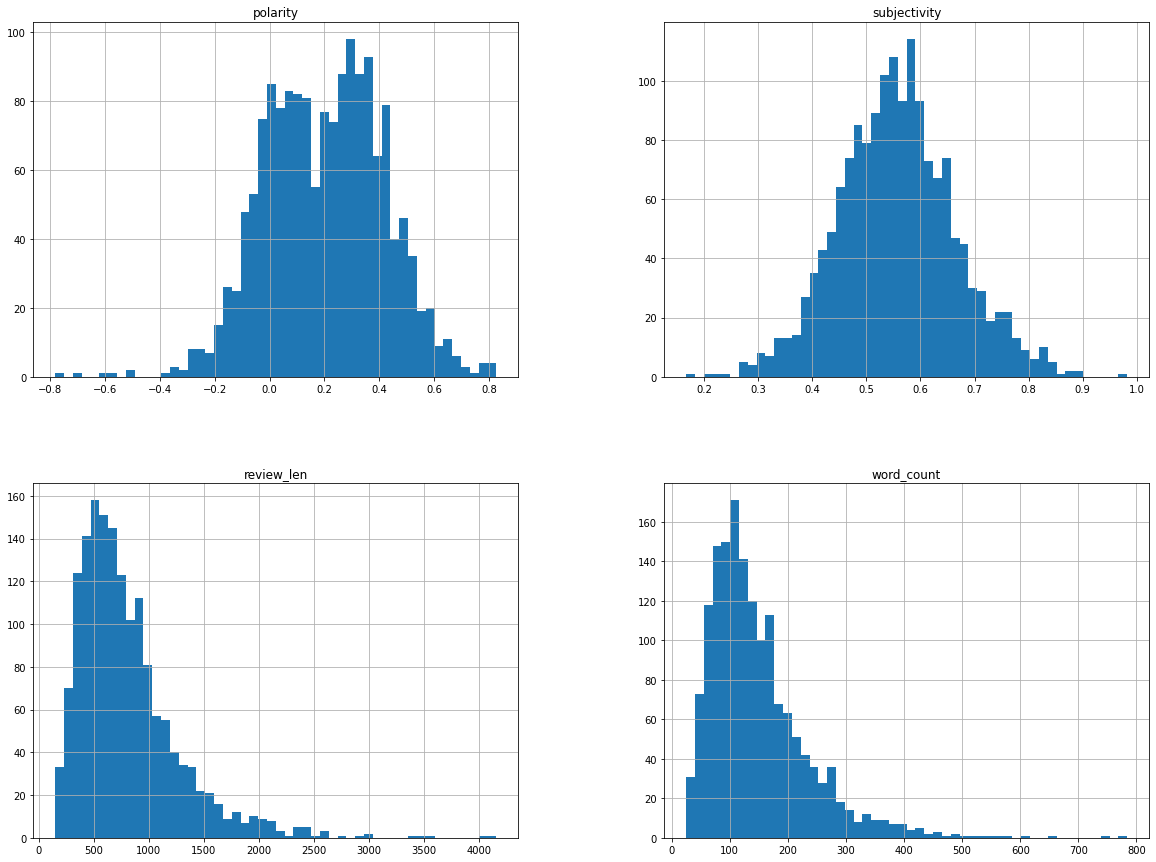

In [53]:
#PLOT ALL REVIEWS
result.hist(bins=50, figsize=(20,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f42bc2a3290>,
      dtype=object)

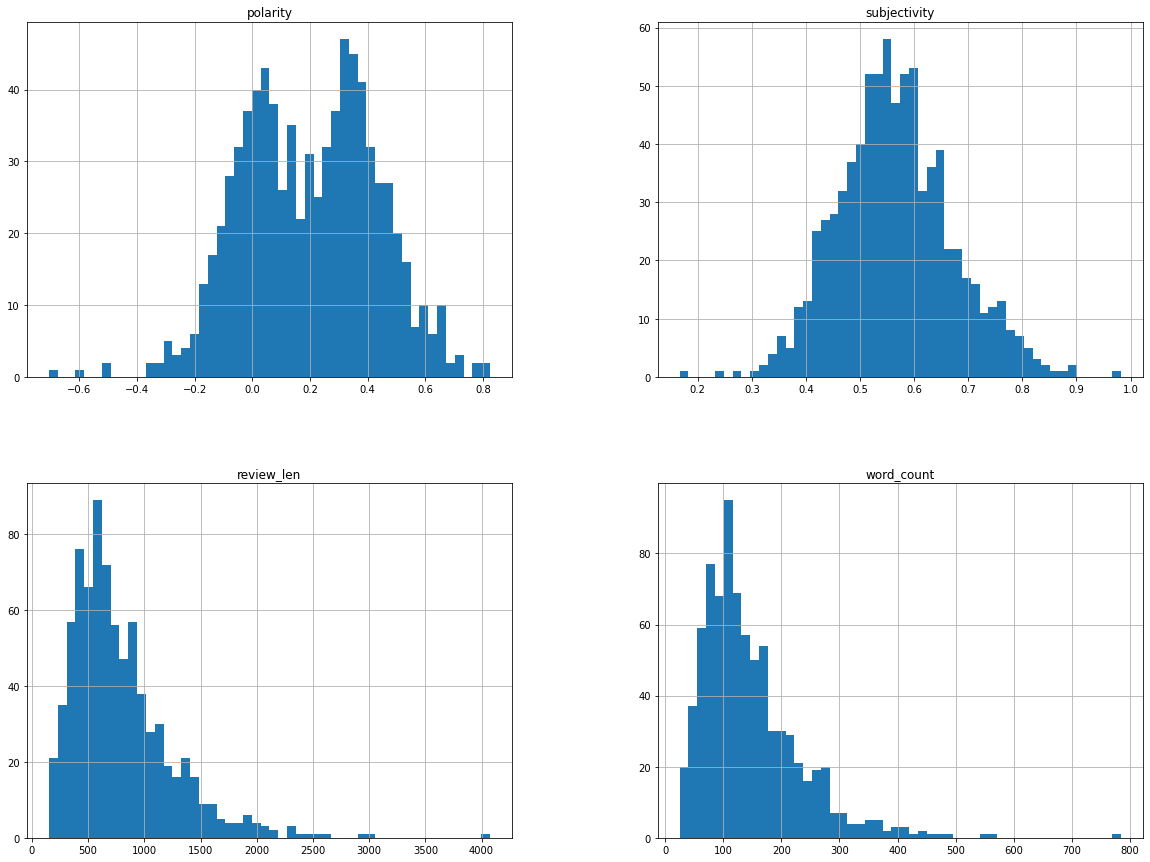

In [54]:
#PLOT DECEPTIVE REVIEWS 
result_deceptive = result[result['Labels'] == 'deceptive'] 
    
#print('\nResult dataframe :\n', result_deceptive)
result_deceptive.hist(bins=50, figsize=(20,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f42c64d1dd0>,
      dtype=object)

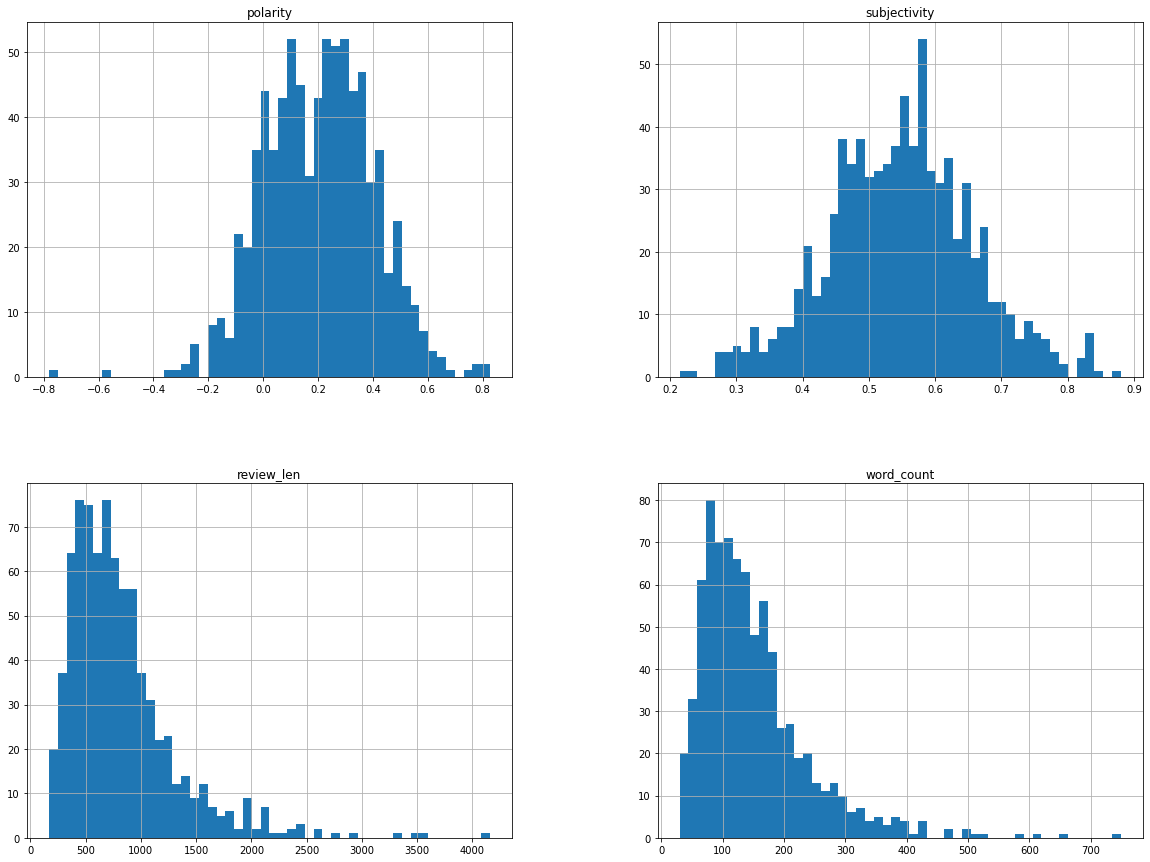

In [55]:
#PLOT TRUTHFUL REVIEWS 
result_truth = result[result['Labels'] == 'truth'] 
    
#print('\nResult dataframe :\n', result_truth)
result_truth.hist(bins=50, figsize=(20,15))

In [61]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [69]:
# TOP UNIGRAMS BEFORE AND AFTER REMOVING STOP WORDS
common_words = get_top_n_words(result['HotelReviews'], 20)
#for word, freq in common_words:
#    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['HotelReviews' , 'count'])

df1.groupby('HotelReviews').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar')

In [70]:
# TOP 20 BIGRAMS BEFORE AND AFTER REMOVING STOP WORDS
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
  
common_words = get_top_n_bigram(result['HotelReviews'], 20)
df3 = pd.DataFrame(common_words, columns = ['HotelReviews' , 'count'])
df3.groupby('HotelReviews').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review BEFORE removing stop words')

common_words = get_top_n_bigram(result['review_without_stopwords_x'], 20)
df4 = pd.DataFrame(common_words, columns = ['review_without_stopwords_x' , 'count'])
df4.groupby('review_without_stopwords_x').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review AFTER removing stop words')

In [71]:
blob = TextBlob(str(result['review_without_stopwords_x']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.iplot(
    kind='bar',
    xTitle='POS',
    yTitle='count', 
    title='Top 20 Part-of-speech tagging for review corpus for all reviews')

In [72]:
blob = TextBlob(str(result_truth['review_without_stopwords_x']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.iplot(
    kind='bar',
    xTitle='POS',
    yTitle='count', 
    title='Top 20 Part-of-speech tagging for review corpus for truthful reviews')

In [73]:
blob = TextBlob(str(result_deceptive['review_without_stopwords_x']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.iplot(
    kind='bar',
    xTitle='POS',
    yTitle='count', 
    title='Top 20 Part-of-speech tagging for review corpus for deceptive reviews')

[0.27084702 0.2589351  0.23629933 0.23391855]


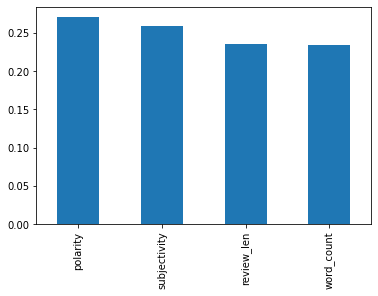

In [82]:
#FEATURE IMPORTANCE

X = result.iloc[:,3:7]  #independent columns
y = result.iloc[:,-1]    #target column

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='bar')
plt.show()

**COMMON METHODS TO IMPLEMENT MODELS**

In [131]:
#@title #Ngram transforn and tfid vectorizer


def ngram_transform(train, test, n, stopwords=None, max_Features=None):

    # instantiate the vectorizer object
    tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,n), lowercase=True, stop_words=stopwords, max_features=max_Features)
    tfidf_vect_ngram.fit(train)

    # convert the documents into a matrix
    xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train)
    xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(test)
    return xtrain_tfidf_ngram, xvalid_tfidf_ngram

In [130]:
#@title Function to split train and test data.

def create_train_test_set():

    # split the dataset into training and validation datasets
    train_x, test_x, train_y, test_y = model_selection.train_test_split(result["pos"], result["Labels"], test_size = 0.20, random_state = 101, shuffle=True)

    # label encode the target variable 
    encoder = preprocessing.LabelEncoder()
    train_y = encoder.fit_transform(train_y)
    test_y = encoder.fit_transform(valid_y)

    # ngram level tf-idf
    xtrain_tfidf_ngram, xtest_tfidf_ngram = ngram_transform(train_x, test_x, n=2)
    return xtrain_tfidf_ngram, xvalid_tfidf_ngram, train_y, test_y

In [202]:
#Function to train model for every classifier
def train_model(name, classifier, feature_vector_train, train_label, feature_vector_valid, valid_label):
    
    # fit the training dataset on the classifier
    start = time.time() 
    classifier.fit(feature_vector_train, train_label) 
    stop = time.time()
        
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)

    #Recall and Precision
    recall = metrics.recall_score(valid_label, predictions)
    precision = metrics.precision_score(valid_label, predictions)

    return {'accuracy':accuracy_score(predictions, valid_label),'f1':f1_score(predictions, valid_label),'Training time':stop - start,'Recall':recall, 'Precision': precision}


In [133]:
Labels=np.concatenate((np.ones((400),dtype=int),np.zeros((400),dtype=int),np.ones((400),dtype=int),np.zeros((400),dtype=int)))
print(Labels)

[1 1 1 ... 0 0 0]


In [136]:
#Split train and test data
xtrain_tfidf_ngram, xtest_tfidf_ngram, train_y, test_y = create_train_test_set()

**SVM**

In [205]:
#SUPPORT VECTOR MACHINE - 5 runs for test data

total_accuracy = 0
total_f1 = 0
total_time = 0
total_recall = 0
total_precision = 0

i = 1
while i < 6:
  SVM_result = train_model("SVM",svm.SVC(kernel='linear'), xtrain_tfidf_ngram, train_y, xtest_tfidf_ngram, test_y)
  total_accuracy = total_accuracy + SVM_result["accuracy"]
  total_f1 = total_f1 + SVM_result["f1"]
  total_time = total_time + SVM_result["Training time"]
  total_recall = total_recall + SVM_result["Recall"]
  total_precision = total_precision + SVM_result["Precision"]
  
  i += 1

print("Average accuracy score",total_accuracy/5)
print("Average f1 score",total_f1/5)
print("Average Training time",total_time/5)
print("Average Recall",total_recall/5)
print("Average Precision",total_precision/5)

Average accuracy score 0.878125
Average f1 score 0.8761904761904763
Average Training time 3.839124822616577
Average Recall 0.8466257668711655
Average Precision 0.9078947368421053


In [227]:
#@title SUPPORT VECTOR MACHINE - 5 runs for train data



total_accuracy = 0
total_f1 = 0
total_time = 0
total_recall = 0
total_precision = 0

i = 1
while i < 6:
  SVM_result = train_model("SVM",svm.SVC(kernel='linear'), xtrain_tfidf_ngram, train_y, xtrain_tfidf_ngram, train_y)
  total_accuracy = total_accuracy + SVM_result["accuracy"]
  total_f1 = total_f1 + SVM_result["f1"]
  total_time = total_time + SVM_result["Training time"]
  total_recall = total_recall + SVM_result["Recall"]
  total_precision = total_precision + SVM_result["Precision"]
  
  i += 1

print("Average accuracy score",total_accuracy/5)
print("Average f1 score",total_f1/5)
print("Average Training time",total_time/5)
print("Average Recall",total_recall/5)
print("Average Precision",total_precision/5)

Average accuracy score 0.99296875
Average f1 score 0.9929632525410476
Average Training time 3.864674425125122
Average Recall 0.9968602825745683
Average Precision 0.9890965732087228


**RANDOM FOREST**

[0.821875, 0.825, 0.84375, 0.859375, 0.865625, 0.85625, 0.859375]
[0.8080808080808081, 0.8108108108108107, 0.8287671232876713, 0.8474576271186441, 0.8552188552188552, 0.8435374149659864, 0.8464163822525597]


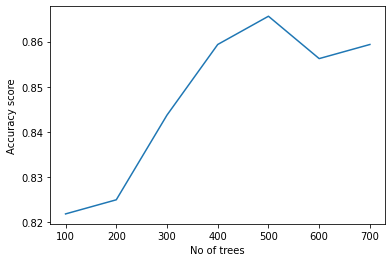

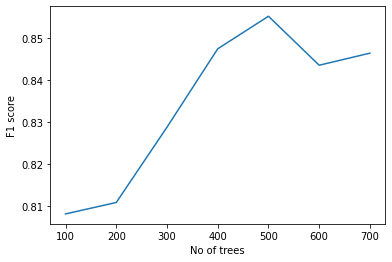

In [206]:
#FINDING HYPER PARAMETER : n_estimators 

n_estimators_values = [100,200,300,400,500,600,700];
accuracy_values = []
f1_values = []

total_accuracy = 0
total_f1 = 0
total_time = 0

for x in n_estimators_values:
  RF_result = train_model("Random Forest",RandomForestClassifier(n_estimators=x, random_state=101, max_features='auto', min_samples_split=2), xtrain_tfidf_ngram, train_y, xtest_tfidf_ngram, test_y)
  accuracy_values.append(RF_result["accuracy"])
  f1_values.append(RF_result["f1"])

print(accuracy_values)
print(f1_values)

plt.plot(n_estimators_values,accuracy_values)
plt.xlabel('No of trees')
plt.ylabel('Accuracy score')
plt.show()

plt.plot(n_estimators_values,f1_values)
plt.xlabel('No of trees')
plt.ylabel('F1 score')
plt.show()

In [207]:
#Running random forest with 500 trees - 5 runs for test data
total_accuracy = 0
total_f1 = 0
total_time = 0
total_recall = 0
total_precision = 0

i = 1
while i < 6:
  RF_result = train_model("Random Forest",RandomForestClassifier(n_estimators=500, random_state=101, max_features='auto', min_samples_split=2), xtrain_tfidf_ngram, train_y, xtest_tfidf_ngram, test_y)
  total_accuracy = total_accuracy + RF_result["accuracy"]
  total_f1 = total_f1 + RF_result["f1"]
  total_time = total_time + RF_result["Training time"]
  total_recall = total_recall + RF_result["Recall"]
  total_precision = total_precision + RF_result["Precision"]
  i += 1

print("Average accuracy score",total_accuracy/5)
print("Average f1 score",total_f1/5)
print("Average Training time",total_time/5)
print("Recall",total_recall/5)
print("Precision",total_precision/5)

Average accuracy score 0.865625
Average f1 score 0.8552188552188552
Average Training time 6.32356448173523
Recall 0.7791411042944786
Precision 0.9477611940298507


In [229]:
#@title Running random forest with 500 trees - 5 runs for train data
total_accuracy = 0
total_f1 = 0
total_time = 0
total_recall = 0
total_precision = 0

i = 1
while i < 6:
  RF_result = train_model("Random Forest",RandomForestClassifier(n_estimators=500, random_state=101, max_features='auto', min_samples_split=2), xtrain_tfidf_ngram, train_y, xtrain_tfidf_ngram, train_y)
  total_accuracy = total_accuracy + RF_result["accuracy"]
  total_f1 = total_f1 + RF_result["f1"]
  total_time = total_time + RF_result["Training time"]
  total_recall = total_recall + RF_result["Recall"]
  total_precision = total_precision + RF_result["Precision"]
  i += 1

print("Average accuracy score",total_accuracy/5)
print("Average f1 score",total_f1/5)
print("Average Training time",total_time/5)
print("Recall",total_recall/5)
print("Precision",total_precision/5)

Average accuracy score 1.0
Average f1 score 1.0
Average Training time 6.1178144931793215
Recall 1.0
Precision 1.0


**NAIVE BAYES**

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



[0.790625, 0.875, 0.84375, 0.8375, 0.8375, 0.834375, 0.834375, 0.828125, 0.821875, 0.81875, 0.81875]
[0.8123249299719888, 0.8684210526315789, 0.8275862068965517, 0.8181818181818181, 0.8169014084507042, 0.8100358422939069, 0.8086642599277978, 0.7999999999999999, 0.7912087912087912, 0.7867647058823529, 0.7867647058823529]


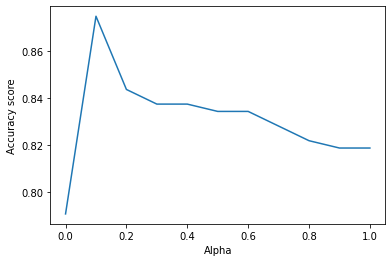

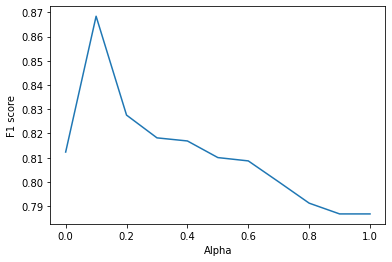

In [208]:
#FINDING HYPER PARAMETER - n_estimators 

alpha_values = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1];
accuracy_values = []
f1_values = []

total_accuracy = 0
total_f1 = 0
total_time = 0


for x in alpha_values:
  NB_result = train_model("Naive Bayes",naive_bayes.MultinomialNB(alpha=x, class_prior=None, fit_prior=False), xtrain_tfidf_ngram, train_y, xtest_tfidf_ngram, test_y)
  accuracy_values.append(NB_result["accuracy"])
  f1_values.append(NB_result["f1"])

print(accuracy_values)
print(f1_values)

plt.plot(alpha_values,accuracy_values)
plt.xlabel('Alpha')
plt.ylabel('Accuracy score')
plt.show()

plt.plot(alpha_values,f1_values)
plt.xlabel('Alpha')
plt.ylabel('F1 score')
plt.show()

In [209]:
#Running Naive Bayes with alpha = 0.1 - 5 runs using TFIDF for test data
total_accuracy = 0
total_f1 = 0
total_time = 0
total_recall = 0
total_precision = 0
i = 1

while i < 6:
  NB_result = train_model("Naive Bayes",naive_bayes.MultinomialNB(alpha=0.1, class_prior=None, fit_prior=False), xtrain_tfidf_ngram, train_y, xtest_tfidf_ngram, test_y)
  total_accuracy = total_accuracy + NB_result["accuracy"]
  total_f1 = total_f1 + NB_result["f1"]
  total_time = total_time + NB_result["Training time"]
  total_recall = total_recall + NB_result["Recall"]
  total_precision = total_precision + NB_result["Precision"]
  i += 1


print("Average accuracy score",total_accuracy/5)
print("Average f1 score",total_f1/5)
print("Average Training time",total_time/5)
print("Average Recall",total_recall/5)
print("Average Precision",total_precision/5)

Average accuracy score 0.875
Average f1 score 0.868421052631579
Average Training time 0.007526922225952149
Average Recall 0.8098159509202454
Average Precision 0.9361702127659575


In [232]:
#@title Running Naive Bayes with alpha = 0.1 - 5 runs using TFIDF for train data

total_accuracy = 0
total_f1 = 0
total_time = 0
total_recall = 0
total_precision = 0
i = 1

while i < 6:
  NB_result = train_model("Naive Bayes",naive_bayes.MultinomialNB(alpha=0.1, class_prior=None, fit_prior=False), xtrain_tfidf_ngram, train_y, xtrain_tfidf_ngram, train_y)
  total_accuracy = total_accuracy + NB_result["accuracy"]
  total_f1 = total_f1 + NB_result["f1"]
  total_time = total_time + NB_result["Training time"]
  total_recall = total_recall + NB_result["Recall"]
  total_precision = total_precision + NB_result["Precision"]
  i += 1


print("Average accuracy score",total_accuracy/5)
print("Average f1 score",total_f1/5)
print("Average Training time",total_time/5)
print("Average Recall",total_recall/5)
print("Average Precision",total_precision/5)

Average accuracy score 0.99765625
Average f1 score 0.9976433621366849
Average Training time 0.009721755981445312
Average Recall 0.9968602825745683
Average Precision 0.9984276729559747


**Naive Bayes - CountVectorize - Alternate Method**


In [220]:
#Running Naive Bayes with alpha = 0.1 - 5 runs using countVectorize (Alternate method) for test data
from sklearn.naive_bayes import MultinomialNB

data = result[["pos", "Labels"]]
data["labelnum"] = data.Labels.map({"truth": 1, "deceptive": 0})
X = data.pos
y = data.labelnum

xtrain, xtest, ytrain, ytest = train_test_split(X, y)

count_vect = CountVectorizer()
xtrain_dtm = count_vect.fit_transform(xtrain)
xtest_dtm = count_vect.transform(xtest)
#print(count_vect.get_feature_names())
df = pd.DataFrame(xtrain_dtm.toarray(), columns=count_vect.get_feature_names())
#print(df)  # Tabular representation.
#print(xtrain_dtm)  # Sparse matrix representation.

nb_clf = MultinomialNB().fit(xtrain_dtm, ytrain)

total_accuracy = 0
total_f1 = 0
total_time = 0
total_recall = 0
total_precision = 0

i = 1
while i < 6:
  start = time.time() 
  predicted = nb_clf.predict(xtest_dtm)
  stop = time.time()
  total_accuracy = total_accuracy + accuracy_score(predicted, ytest)
  total_f1 = total_f1 + f1_score(predicted, ytest)
  total_recall = total_recall + metrics.recall_score(ytest, predicted)
  total_precision = total_precision + metrics.precision_score(ytest, predicted)
  total_time = total_time + (stop - start)
  i += 1    

print("Average accuracy score",total_accuracy/5)
print("Average f1 score",total_f1/5)
print("Average Training time",total_time/5)
print("Average Recall",total_recall/5)
print("Average Precision",total_precision/5)

Average accuracy score 0.865
Average f1 score 0.85
Average Training time 0.00045757293701171876
Average Recall 0.8138297872340425
Average Precision 0.8895348837209303


In [233]:
#@title Running Naive Bayes with alpha = 0.1 - 5 runs using countVectorize (Alternate method) for Train data

from sklearn.naive_bayes import MultinomialNB

data = result[["pos", "Labels"]]
data["labelnum"] = data.Labels.map({"truth": 1, "deceptive": 0})
X = data.pos
y = data.labelnum

xtrain, xtest, ytrain, ytest = train_test_split(X, y)

count_vect = CountVectorizer()
xtrain_dtm = count_vect.fit_transform(xtrain)
xtest_dtm = count_vect.transform(xtest)
#print(count_vect.get_feature_names())
df = pd.DataFrame(xtrain_dtm.toarray(), columns=count_vect.get_feature_names())
#print(df)  # Tabular representation.
#print(xtrain_dtm)  # Sparse matrix representation.

nb_clf = MultinomialNB().fit(xtrain_dtm, ytrain)

total_accuracy = 0
total_f1 = 0
total_time = 0
total_recall = 0
total_precision = 0

i = 1
while i < 6:
  start = time.time() 
  predicted = nb_clf.predict(xtrain_dtm)
  stop = time.time()
  total_accuracy = total_accuracy + accuracy_score(predicted, ytrain)
  total_f1 = total_f1 + f1_score(predicted, ytrain)
  total_recall = total_recall + metrics.recall_score(ytrain, predicted)
  total_precision = total_precision + metrics.precision_score(ytrain, predicted)
  total_time = total_time + (stop - start)
  i += 1    

print("Average accuracy score",total_accuracy/5)
print("Average f1 score",total_f1/5)
print("Average Training time",total_time/5)
print("Average Recall",total_recall/5)
print("Average Precision",total_precision/5)

Average accuracy score 0.97
Average f1 score 0.9695945945945945
Average Training time 0.0010997295379638673
Average Recall 0.9630872483221478
Average Precision 0.976190476190476


**HARDWARE SETTINGS**

In [222]:
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               79
Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz
Stepping:            0
CPU MHz:             2200.148
BogoMIPS:            4400.29
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            56320K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_sin

In [223]:
!grep MemTotal /proc/meminfo 

MemTotal:       13305332 kB


In [225]:
!df -h 

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   39G   69G  37% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
shm             5.9G     0  5.9G   0% /dev/shm
tmpfs           6.4G   28K  6.4G   1% /var/colab
/dev/sda1       114G   41G   74G  36% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G  6.0G  9.1G  40% /content/drive
